# Special Terms

**Resources**

- [Stanford Parser](https://nlp.stanford.edu/software/lex-parser.shtml)
- [GATE Twitter part-of-speech tagger](https://gate.ac.uk/wiki/twitter-postagger.html)

Numbers and proper nouns are likely to represent the important facts [1]. We consider the numbers and proper nouns as special terms. This feature is the count of the number of special terms present in the sentence.
This feature can be normalized dividing it with the total count of unique special terms present in the
conversation.

Using the GATE POS tagger.

Example outputs:
```
in_IN the_DT TODO_NNP i_PRP found_VBD that_IN the_DT event_NN system_NN is_VBZ not_RB flexible_JJ enough..._NN
so_RB there_EX were_VBD some_DT problems..._NNS
what_WP kind_NN of_IN changes_NNS are_VBP you_PRP thinking_VBG of?_NNP
let_VB me_PRP reread_VBD todo_NN
I'm_VBP not_RB 100%_CD sure_JJ that_IN applies_VBZ anymore_RB
ah_UH ok..._UH
was_VBD thinking_VBG of_IN i18n_NN but_CC that_DT requires_VBZ python2_NN i_PRP think..._VBP
is_VBZ python1.52_NN still_RB standard?_VBG
```

The Parts of Speech tags are derived from the [Penn Treebank Project](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html)


| Number | Tag | Description |
|--------|:-----:|---------|
| 1.	| CC	| Coordinating conjunction |
| 2.	| CD	| Cardinal number |
| 3.	| DT	| Determiner |
| 4.	| EX	| Existential there |
| 5.	| FW	| Foreign word |
| 6.	| IN	| Preposition or subordinating conjunction |
| 7.	| JJ	| Adjective |
| 8.	| JJR	| Adjective, comparative |
| 9.	| JJS	| Adjective, superlative |
| 10.	| LS	| List item marker |
| 11.	| MD	| Modal |
| 12.	| NN	| Noun, singular or mass |
| 13.	| NNS	| Noun, plural |
| 14.	| NNP	| Proper noun, singular |
| 15.	| NNPS	| Proper noun, plural |
| 16.	| PDT	| Predeterminer |
| 17.	| POS	| Possessive ending |
| 18.	| PRP	| Personal pronoun |
| 19.	| `PRP$`	| Possessive pronoun |
| 20.	| RB	| Adverb |
| 21.	| RBR	| Adverb, comparative |
| 22.	| RBS	| Adverb, superlative |
| 23.	| RP	| Particle |
| 24.	| SYM	| Symbol |
| 25.	| TO	| to |
| 26.	| UH	| Interjection |
| 27.	| VB	| Verb, base form |
| 28.	| VBD	| Verb, past tense |
| 29.	| VBG	| Verb, gerund or present participle |
| 30.	| VBN	| Verb, past participle |
| 31.	| VBP	| Verb, non-3rd person singular present |
| 32.	| VBZ	| Verb, 3rd person singular present |
| 33.	| WDT	| Wh-determiner |
| 34.	| WP	| Wh-pronoun |
| 35.	| WP$	| Possessive wh-pronoun |
| 36.	| WRB	| Wh-adverb |

The exact ones used in the GATE application can be found here: [Part-of-Speech Tags used in the Hepple Tagger](https://gate.ac.uk/sale/tao/splitap7.html#x39-743000G)

[1]
(J. Bengel, S. Gauch, E. Mittur, and R. Vijayaraghavan. Chattrack: Chat room topic detection using classification.
In Intelligence and Security Informatics, pages 266–277, 2004.)

Tagging the entire chat data took 2 hours:
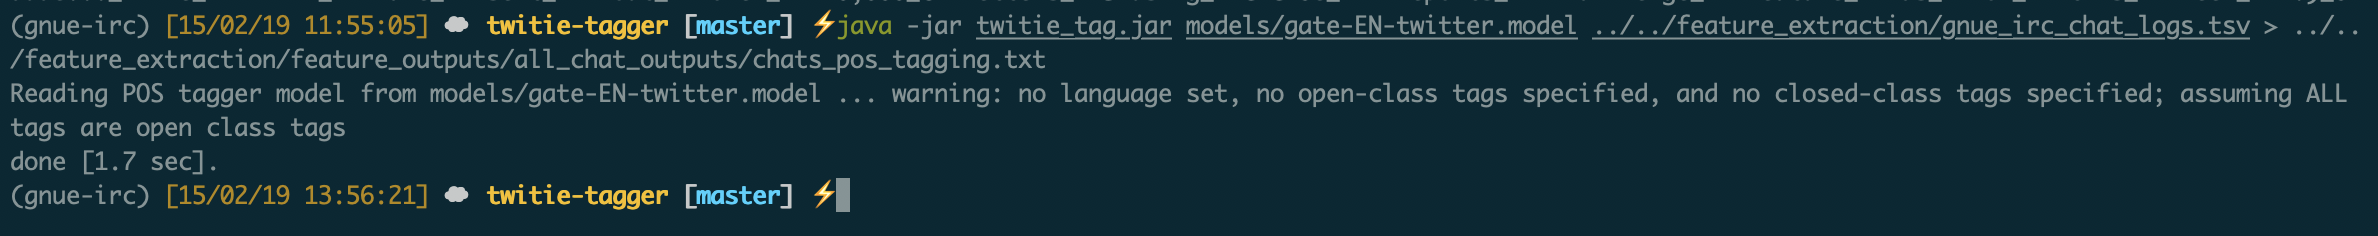

Note that blank lines are ignored in the POS tagger module, thus after some oint, the line numbers of the input and output file don't exactly match

In [127]:
import re
from string import printable
from os.path import join

PRINTABLE = set(printable)

In [128]:
def remove_non_printable_characters_from_string(chars):
    return ''.join(char for char in chars if char in PRINTABLE)

In [129]:
def preprocess_chat_log_file(input_file, output_file):
    with open(input_file) as in_file, open(output_file, "w") as out_file:
        for chat_line in in_file:
            out_file.write(remove_non_printable_characters_from_string(chat_line))
            

In [130]:
# preprocess_chat_log_file(
#     'gnue_irc_chat_logs_trimmed.tsv',
#     'gnue_irc_chat_logs_preprocessed.txt'
# )

In [137]:
def delimit_pos_tagging(sentence):
    return [re.split(r"_[A-Z\.:\-\$`\(\),\'#]+$", word)[0] for word in sentence.split()]

In [134]:

def fix_pos_tagging_output_file(input_file, output_file, fix_file):
    with open(input_file) as in_file, open(output_file) as out_file, open(fix_file, 'w') as fix_file:
        in_text = in_file.readline()
        out_text = out_file.readline()
        line_number = 1
        corrected = 0
        while in_text:
            pos_words = delimit_pos_tagging(out_text)
            if in_text.split() == pos_words:
                if line_number == 259218:
                    print("\n\nIn text!! - ", in_text.encode('utf-8'))
                    print("\n\nIn text2!! - ", in_text.split())
                    print("Length: ", len(in_text))
                # print(pos_words)
                fix_file.write(out_text)
                in_text = in_file.readline()
                out_text = out_file.readline()
            else:
                corrected += 1
                print("{}: | POS => {} | | In-Text=> {} | Length: {}".format(
                    line_number, 
                    pos_words, 
                    in_text.encode('utf-8'),
                    len(in_text.encode('utf-8'))
                )) 
                fix_file.write(in_text)
                in_text = in_file.readline()
                
            line_number += 1
        print(corrected)
            
        
    

In [133]:
file_dir = 'example_files'
fix_pos_tagging_output_file(
    join(file_dir,'chat_input.txt'), 
    join(file_dir,'pos_tagging_output.txt'),
    join(file_dir,'insert_file.txt')
)

2: | POS => ['howdy'] | | In-Text=> b'\n' | Length: 1
6: | POS => ['Thank'] | | In-Text=> b'\n' | Length: 1
8: | POS => ['1\x1b[15~'] | | In-Text=> b'\x1b1\x1b[15~\n' | Length: 8
9: | POS => ['1\x1b[15~'] | | In-Text=> b';)\n' | Length: 3
4


In [136]:
file_dir = 'feature_outputs'
fix_pos_tagging_output_file(
    'gnue_irc_chat_logs_preprocessed.txt', 
    join(file_dir,'chats_pos_tagging_preprocessed.txt'),
    join(file_dir,'corrected_pos_tagging_preprocessed.txt')
)

6400: | POS => ['howdy'] | | In-Text=> b'\n' | Length: 1
6404: | POS => ['Thank'] | | In-Text=> b'\n' | Length: 1
7884: | POS => ['CREATE', 'TABLE', 'tblProvince', '('] | | In-Text=> b'\n' | Length: 1
7891: | POS => ['jbailey:', 'that', 'form', 'looks', 'ok', 'to', 'me'] | | In-Text=> b'\n' | Length: 1
7938: | POS => ['jamest:', "it's", 'a', 'perverted', 'mutation', 'of', 'city,', 'state,', 'zip'] | | In-Text=> b'\n' | Length: 1
8089: | POS => ['solved', 'my', 'problem', 'i', 'think'] | | In-Text=> b'\n' | Length: 1
27816: | POS => ['so', 'I', 'need', 'to', 'live', 'with', 'PHP3'] | | In-Text=> b'\n' | Length: 1
35125: | POS => ['Unable', 'to', 'load', 'locale', 'information', 'falling', 'back', 'to', 'default', 'English', 'language', 'translations.'] | | In-Text=> b'\n' | Length: 1
39458: | POS => ['class', 'geasObjectRepository:'] | | In-Text=> b'\n' | Length: 1
39460: | POS => ['def', 'storeObject(', 'OID', '):'] | | In-Text=> b'\n' | Length: 1
42150: | POS => ['cur', '=', 'self.dat

265733: | POS => ['what', 'is', 'the', 'needing', 'of', 'str', 'here?'] | | In-Text=> b'\n' | Length: 1
274324: | POS => ['hi', 'all'] | | In-Text=> b'\n' | Length: 1
278245: | POS => ['date', 'posted;', '#', 'if', 'empty', 'not', 'posted'] | | In-Text=> b'\n' | Length: 1
278523: | POS => ['incredible', 'demo', ':)'] | | In-Text=> b'\n' | Length: 1
279945: | POS => ['okay,', 'to', 'sum', 'it', 'up:'] | | In-Text=> b'\n' | Length: 1
282120: | POS => ['#', 'Add', 'this', 'objects', 'children', 'to', "it's", 'namespace', 'by', 'their', 'name'] | | In-Text=> b'\n' | Length: 1
282127: | POS => ['?'] | | In-Text=> b'\n' | Length: 1
284135: | POS => ['ok...'] | | In-Text=> b'\n' | Length: 1
285385: | POS => ['GNUe', 'Common', 'Version', '0.5.2'] | | In-Text=> b'\n' | Length: 1
285387: | POS => ['Error:', '[Errno', '2]', 'No', 'such', 'file', 'or', 'directory:', "'/etc/gnue/report-filters.conf'"] | | In-Text=> b'\n' | Length: 1
285389: | POS => ['For', 'help,', 'type:'] | | In-Text=> b'\n' | L

450369: | POS => ['Can', 'be', 'changed', 'if', 'manually', 'edit', 'site.py', 'to', 'let'] | | In-Text=> b'\n' | Length: 1
450394: | POS => ['</site.py>'] | | In-Text=> b'\n' | Length: 1
456140: | POS => ['9.', '(Student', 'Slang)'] | | In-Text=> b'\n' | Length: 1
456161: | POS => ['First', 'release', 'on', 'sf', 'was', '24-12-02', 'so', 'maybe', 'not'] | | In-Text=> b'\n' | Length: 1
465113: | POS => ['yeah'] | | In-Text=> b'\n' | Length: 1
465231: | POS => ['now', 'I', 'can', 'load', 'a', 'gfd', 'file', 'from', 'the', 'command', 'line,', 'I', 'just', 'added', '"string"', 'to', 'the', 'list', 'of', 'imported', 'modules.'] | | In-Text=> b'\n' | Length: 1
465234: | POS => ['nd', 'what', 'version', 'of', 'wxPython', 'you', 'use?'] | | In-Text=> b'\n' | Length: 1
465251: | POS => ['had', 'to', 'add', '"import', 'string"', 'to', '/usr/local/gnue/lib/python/gnue/designer/TemplateParser.py'] | | In-Text=> b'\n' | Length: 1
465254: | POS => ['did', 'not', 'get', 'rid', 'of', 'the', 'previos'

In [148]:
def get_pos_tags(sentence):
    pos_tags = (re.match(r".*_([A-Z\.:\-\$`\(\),\'#]+)", word) 
            for word in sentence.split())
    return [tag.group(1) for tag in pos_tags]

In [149]:
get_pos_tags("i_PRP can_MD try_VB :/_UH ??_.")

['PRP', 'MD', 'VB', 'UH', '.']

In [150]:
def get_tags_count(pos_tags):
    tags_count = {}
    for tag in pos_tags:
        if tag in tags_count:
            tags_count[tag] += 1
        else:
            tags_count[tag] = 1
    return tags_count
    

In [152]:
pos_tags = get_pos_tags("i_PRP can_MD try_VB :/_UH ??_.")
get_tags_count(pos_tags)

{'PRP': 1, 'MD': 1, 'VB': 1, 'UH': 1, '.': 1}

Special Terms are taken to be numbers and proper nouns. They are represented as such:

- **CD** - cardinal number
- **NNP** - proper noun - singular: All words in names usually are capitalized but titles might not be.
- **NNPS** - proper noun - plural: All words in names usually are capitalized but titles might not be.
- **NP** - proper noun - singular
- **NPS** - proper noun - plural

In [155]:
SPECIAL_TERMS = {"CD", "NNP", "NNPS", "NP", "NPS"}
def generate_special_terms_count_file(pos_tags_file, special_terms_file):
    with open(pos_tags_file) as pos_file, open(special_terms_file, "w") as special_terms_file:
        for sentence in pos_file:
            pos_tags = get_pos_tags(sentence)
            tags_count = get_tags_count(pos_tags)
            total_special_term_count = 0
            for tag, count in tags_count.items():
                if tag in SPECIAL_TERMS:
                    total_special_term_count += count
            special_terms_file.write("{}\n".format(total_special_term_count))
        

In [158]:
file_dir = 'feature_outputs'
pos_file = join(file_dir,'corrected_pos_tagging_preprocessed.txt')
special_terms_file = join(file_dir,'special_terms_count.txt')
# generate_special_terms_count_file(
#     pos_file,
#     special_terms_file
# )

Normalize the counts by dividing by the highest count

In [159]:
def normalize_special_terms_counts(special_terms_file, normalized_special_terms_file):
    with open(special_terms_file) as special_terms_file, open(normalized_special_terms_file, "w") as normalized_special_terms_file:
        max_special_terms_count = float('-inf')
        for count in special_terms_file:
            max_special_terms_count = max(max_special_terms_count, int(count.strip()))
        if max_special_terms_count == 0:
            raise ValueError("The maximum count is zero")
        special_terms_file.seek(0)
        for count in special_terms_file:
            normalized_count = int(count.strip()) / max_special_terms_count
            normalized_special_terms_file.write("{}\n".format(normalized_count))
            
            

In [160]:
file_dir = 'feature_outputs'
special_terms_file = join(file_dir,'special_terms_count.txt')
normalized_special_terms_file = join(file_dir,'normalized_special_terms_count.txt')
normalize_special_terms_counts(special_terms_file, normalized_special_terms_file)
